In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

path = '//home//khalid//pythonfiles//classExo2.txt'
studentdata = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

print('Student data: \n', studentdata.head(10))
print('\nData describe: \n', studentdata.describe())

positive = studentdata[studentdata['Accepted'].isin([1])]
negative = studentdata[studentdata['Accepted'].isin([0])]

print('\nAccepter students: \n', positive.head(10))
print('\nNo accepter students: \n', negative.head(10))

Student data: 
      Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1

Data describe: 
            Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000

Accepter students: 
      Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800 

Text(0, 0.5, 'Test 2 score')

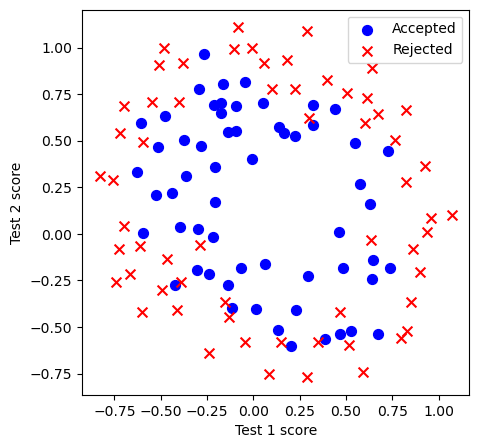

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')

In [23]:
degree = 5
x1 = studentdata['Test 1']
x2 = studentdata['Test 2']

print('x1: \n', x1.head(5))
print('\nx2: \n', x2.head(5))

#adding x0
studentdata.insert(3, 'Ones', 1)
print('\nStudent Data: \n', studentdata.head(5))

x1: 
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
Name: Test 1, dtype: float64

x2: 
 0    0.69956
1    0.68494
2    0.69225
3    0.50219
4    0.46564
Name: Test 2, dtype: float64

Student Data: 
      Test 1   Test 2  Accepted  Ones
0  0.051267  0.69956         1     1
1 -0.092742  0.68494         1     1
2 -0.213710  0.69225         1     1
3 -0.375000  0.50219         1     1
4 -0.513250  0.46564         1     1


In [24]:
'''
This all for regularization:
x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3

when i=1 and j=0
F10 = x1

when i=2 and j=0 to 1
F20 = x1^2
F21 = x1 x2

when i=3 and j=0 to 2
F30 = x1^3
F31 = x1^2 x2
F32 = x1 x2^2

when i=4 and j=0 to 3
F40 = x1^4
F41 = x1^3 x2
F42 = x1^2 x2^2
F43 = x1 x2^3
'''

#code to make all F

for i in range(1, degree):
    for j in range(0,i):
        studentdata['F'+str(i)+str(j)] = np.power(x1, i-j) * np.power(x2,j)

#we don't need data of test 1 and 3 that why we removed it
studentdata.drop('Test 1', axis=1, inplace=True)
studentdata.drop('Test 2', axis=1, inplace=True) 

print('Student data: \n', studentdata.head(10))

Student data: 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.01755

In [25]:
#functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costReg(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    #classification cost function
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    
    #(alpha/2m) * (sum of thetas power 2)
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(first - second) / (2*len(X)) + reg

def gradientReg(theta, X, y, learninRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if i==0:
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
            
    return grad

In [26]:
cols = studentdata.shape[1]

X2 = studentdata.iloc[:,1:cols]
print(X2.head(8))

y2 = studentdata.iloc[:,0:1]
print('\n',y2.head(8))

   Ones       F10       F20       F21       F30       F31       F32       F40  \
0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089  0.000007   
1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509  0.000074   
2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412  0.002086   
3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573  0.019775   
4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283  0.069393   
5     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098  0.075836   
6     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470  0.025102   
7     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305  0.008754   

        F41       F42       F43  
0  0.000094  0.001286  0.017551  
1 -0.000546  0.004035 -0.029801  
2 -0.006757  0.021886 -0.070895  
3 -0.026483  0.035465 -0.047494  
4 -0.062956  0.057116 -0.051818  
5 -0.030319  0.012121 -0.004846  
6 -0.002167  0.000187 -0.000016 

In [27]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ', theta2)

theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
#if the learning rate is too small and you have big data, the model takes a lot of time to work
learningRate = 0.0001 # alpha

rcost = costReg(theta2, X2, y2, learningRate) # cost function after regularization
print()
print('regularized cost = ' , rcost)
print()


regularized cost =  0.3465735902799727



In [29]:
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
print( 'result = ' , result )
print()

  NIT   NF   F                       GTG
    0    1  3.465735902799727E-01   5.27766673E-03
    1   35  3.325332191532257E-01   1.58412752E-03
tnc: fscale = 25.1249


result =  (array([ 0.38311145,  0.30295185, -1.17006547, -0.73423224,  0.39026223,
       -0.13121663, -0.61740709, -0.87021801,  0.03918562, -1.00967997,
       -0.07421436]), 91, 1)



tnc: |fn-fn-1] = 7.0701e-17 -> convergence
    2   91  3.325332191532256E-01   1.58412752E-03
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [30]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])

predictions = predict(theta_min, X2)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]

accuracy = (sum(map(int, correct)) % len(correct))

print ('accuracy = {0}%'.format(accuracy))


accuracy = 80%
